In [90]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

# Question 1 - Extracting Tesla Stock Data Using yfinance


In [4]:
tesla = yf.Ticker('TSLA')
tesla_data = tesla.history(period='max')
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


# Question 2 - Extracting Tesla Revenue Data Using Webscraping

In [106]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.93 Safari/537.36'
}
response = requests.get(url, headers=headers)
max_data_size = None
soup = BeautifulSoup(response.text, 'html.parser')
revenue_table = soup.find_all("tbody")[1].find_all('tr')
data = []
for i, row in enumerate(revenue_table):
    if i == max_data_size:
        break
    cols = row.find_all('td')
    cols = [pd.to_datetime(col.text) if col.text[0] != '$' else int(col.text[1:].replace(',', '')) for col in cols if len(col.text) > 0 ]
    if len(cols) == 2:
        data.append(cols)
columns = ['Date', 'Revenue']
tesla_revenue = pd.DataFrame(data, columns=columns)
tesla_revenue.tail()


,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
51,2009-09-30,46
52,2009-06-30,27


# Question 3: Use yfinance to Extract Stock Data




In [45]:
gamestop = yf.Ticker('GME')
gamestop_data = gamestop.history(period='max')
gamestop_data.reset_index(inplace=True)
gamestop_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578048,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


# Question 4: Extracting GameStop Revenue Data Using Webscraping

In [107]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.93 Safari/537.36'
}
response = requests.get(url, headers=headers)
max_data_size = None
soup = BeautifulSoup(response.text, 'html.parser')
revenue_table = soup.find_all("tbody")[1].find_all('tr')
data = []
for i, row in enumerate(revenue_table):
    if i == max_data_size:
        break
    cols = row.find_all('td')
    cols = [pd.to_datetime(col.text) if col.text[0] != '$' else int(col.text[1:].replace(',', '')) for col in cols if len(col.text) > 0 ]
    if len(cols) == 2:
        data.append(cols)
columns = ['Date', 'Revenue']
gmt_revenue = pd.DataFrame(data, columns=columns)
gmt_revenue.tail()


,Date,Revenue
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


In [75]:
print(type(tesla_data['Date'][0]))


<class 'pandas._libs.tslibs.timestamps.Timestamp'>


# Question 5: Plot Tesla Stock Graph



In [108]:
def make_graph(data, revenue, title):
    plt.plot(data["Date"], data['Close'])
    plt.title(title + " stock graph")
    plt.show()
    plt.plot(revenue["Date"], (revenue["Revenue"]))
    plt.title(title + " revenue graph")

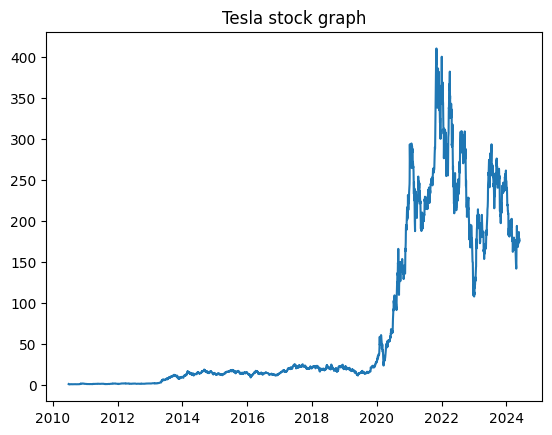

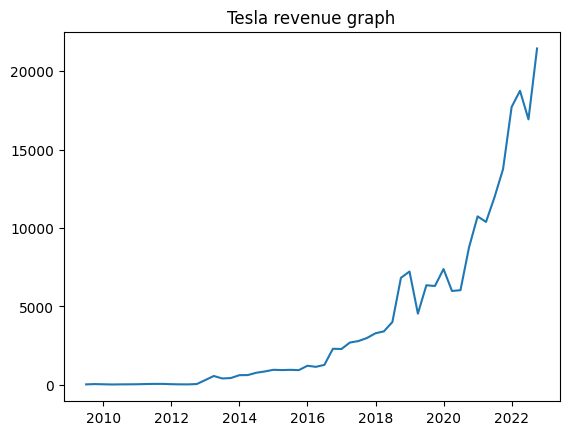

In [109]:
make_graph(tesla_data, tesla_revenue, "Tesla")

# Question 6: Plot GameStop Stock Graph

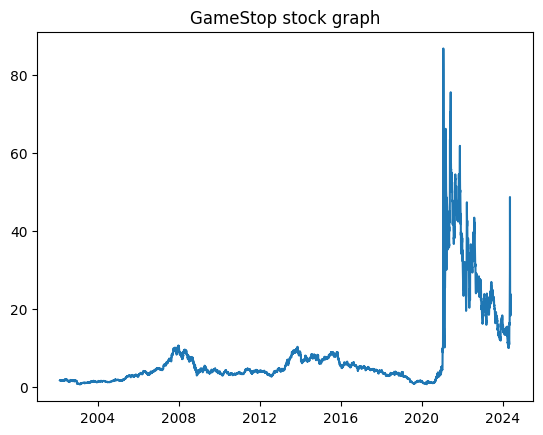

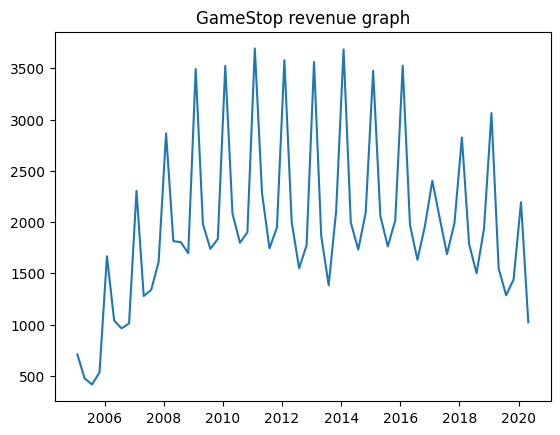

In [110]:
make_graph(gamestop_data, gmt_revenue, "GameStop")